In [1]:
#Our first machine learning model
#Garreta and Moncecchi pp 10-20
#uses Iris database and SGD classifier
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

The scikit learn version is 0.19.2.


In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print( X_iris.shape, y_iris.shape)
#(150, 4) (150,)
print( X_iris[0], y_iris[0])
#(150, 4) (150,)
#[ 5.1  3.5  1.4  0.2] 0

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)
#(112, 2) (112,)

(112, 2) (112,)


D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

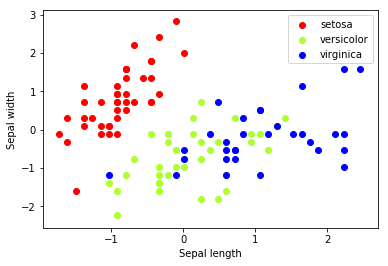

In [6]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

In [7]:
#found a typo here... incorrect from book followed by corrected code
#from sklearn.linear_modelsklearn._model import SGDClassifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
print( clf.coef_)
#[[-28.53692691 15.05517618]
#[ -8.93789454 -8.13185613]
#[ 14.02830747 -12.80739966]]

[[-30.0529983   19.13871055]
 [  4.59180001 -15.67436168]
 [ 11.80558436  -0.6056554 ]]


In [9]:
print( clf.intercept_)
#[-17.62477802 -2.35658325 -9.7570213 ]

[-17.51148994   3.56615468 -11.43574854]


D:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3361: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


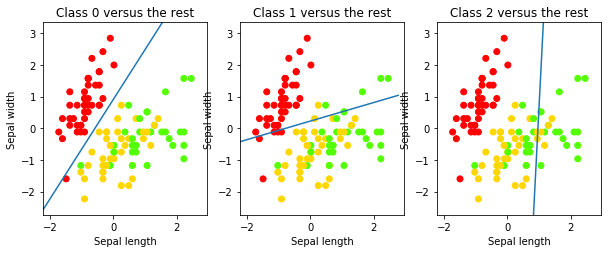

In [10]:
#don't forget to import Numpy as np here
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
#error in case Xs or xs
Xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - Xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(Xs, ys, hold=True)

In [11]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )
#[0]

[0]


In [12]:
print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )
#[[ 19.73905808 8.13288449 -28.63499119]]

[[ 22.14741445  -3.69722364 -26.36208629]]


In [13]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )
#0.821428571429

0.7589285714285714


In [14]:
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )
#0.684210526316

0.5526315789473685


In [15]:
print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )
#precision recall f1-score support
#setosa 1.00 1.00 1.00 8
#versicolor 0.43 0.27 0.33 11
#virginica 0.65 0.79 0.71 19
#avg / total 0.66 0.68 0.66 38

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.39      1.00      0.56        11
  virginica       1.00      0.11      0.19        19

avg / total       0.82      0.55      0.47        38



In [16]:
print( metrics.confusion_matrix(y_test, y_pred) )
#[[ 8 0 0]
#[ 0 3 8]
#[ 0 4 15]]

[[ 8  0  0]
 [ 0 11  0]
 [ 0 17  2]]


In [17]:
print("My name is Jingfan Xing")
print("My NetID is: jingfan5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
######STOP HERE######################

My name is Jingfan Xing
My NetID is: jingfan5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [18]:
##error in scikit learn package, which version??
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline
# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([(
        'scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print( scores )
#[ 0.66666667 0.93333333 0.66666667 0.7 0.6 ]

[0.66666667 0.8        0.76666667 0.76666667 0.6       ]


D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stoc

In [19]:
from scipy.stats import sem
def mean_score(scores): return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print( mean_score(scores) )
#Mean score: 0.713 (+/-0.057)

Mean score: 0.720 (+/- 0.037)
